# Lets Import some Libraries and dataset

# Zomato Restaurant

Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies 
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets



In [1]:
#import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings ('ignore')

In [2]:
# Reading file (Had to change to xlsx as there was an encoding error)
data = pd.read_excel("zomato1.xlsx")
pd.set_option("display.max_columns",None)
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
data1=pd.read_excel('Country-Code.xlsx')
data1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
#Merging both datasets (Thanks for the hint!)
data = pd.merge(data,data1,on='Country Code',how='left')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


I can see that the merge has been successful

In [5]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [6]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

Mix of data types which will need to be treated.I can see that the target is an int64 format, which suggests that this will be a regression problem

In [7]:
data.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

9 counts of null values are in cuisines

There is a problem as I can't use 'mode' or any other imputation method because each cuisine is unique. So I will treat it by identifying the 9 counts as Null

In [9]:
#Handlind null values
data['Cuisines']=data['Cuisines'].fillna("Null")

In [10]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Missing values treated

In [11]:
#checking the unique values
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1826
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [12]:
# Dropping irrelevant columns. Address and restaurant ID are irrelevant as they offer no useful insight. Switch to order menu only has one unique value so I will drop this too.
data.drop(["Address", "Restaurant ID", "Switch to order menu"], axis=1, inplace=True)

In [13]:
data.head(5)

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
print(data['Rating color'].unique())

['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']


Based on exploring the data, I can infer that Dark green is the best, red is the worst and that white was not rated. I will explore the unrated columns later.

In [15]:
data.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

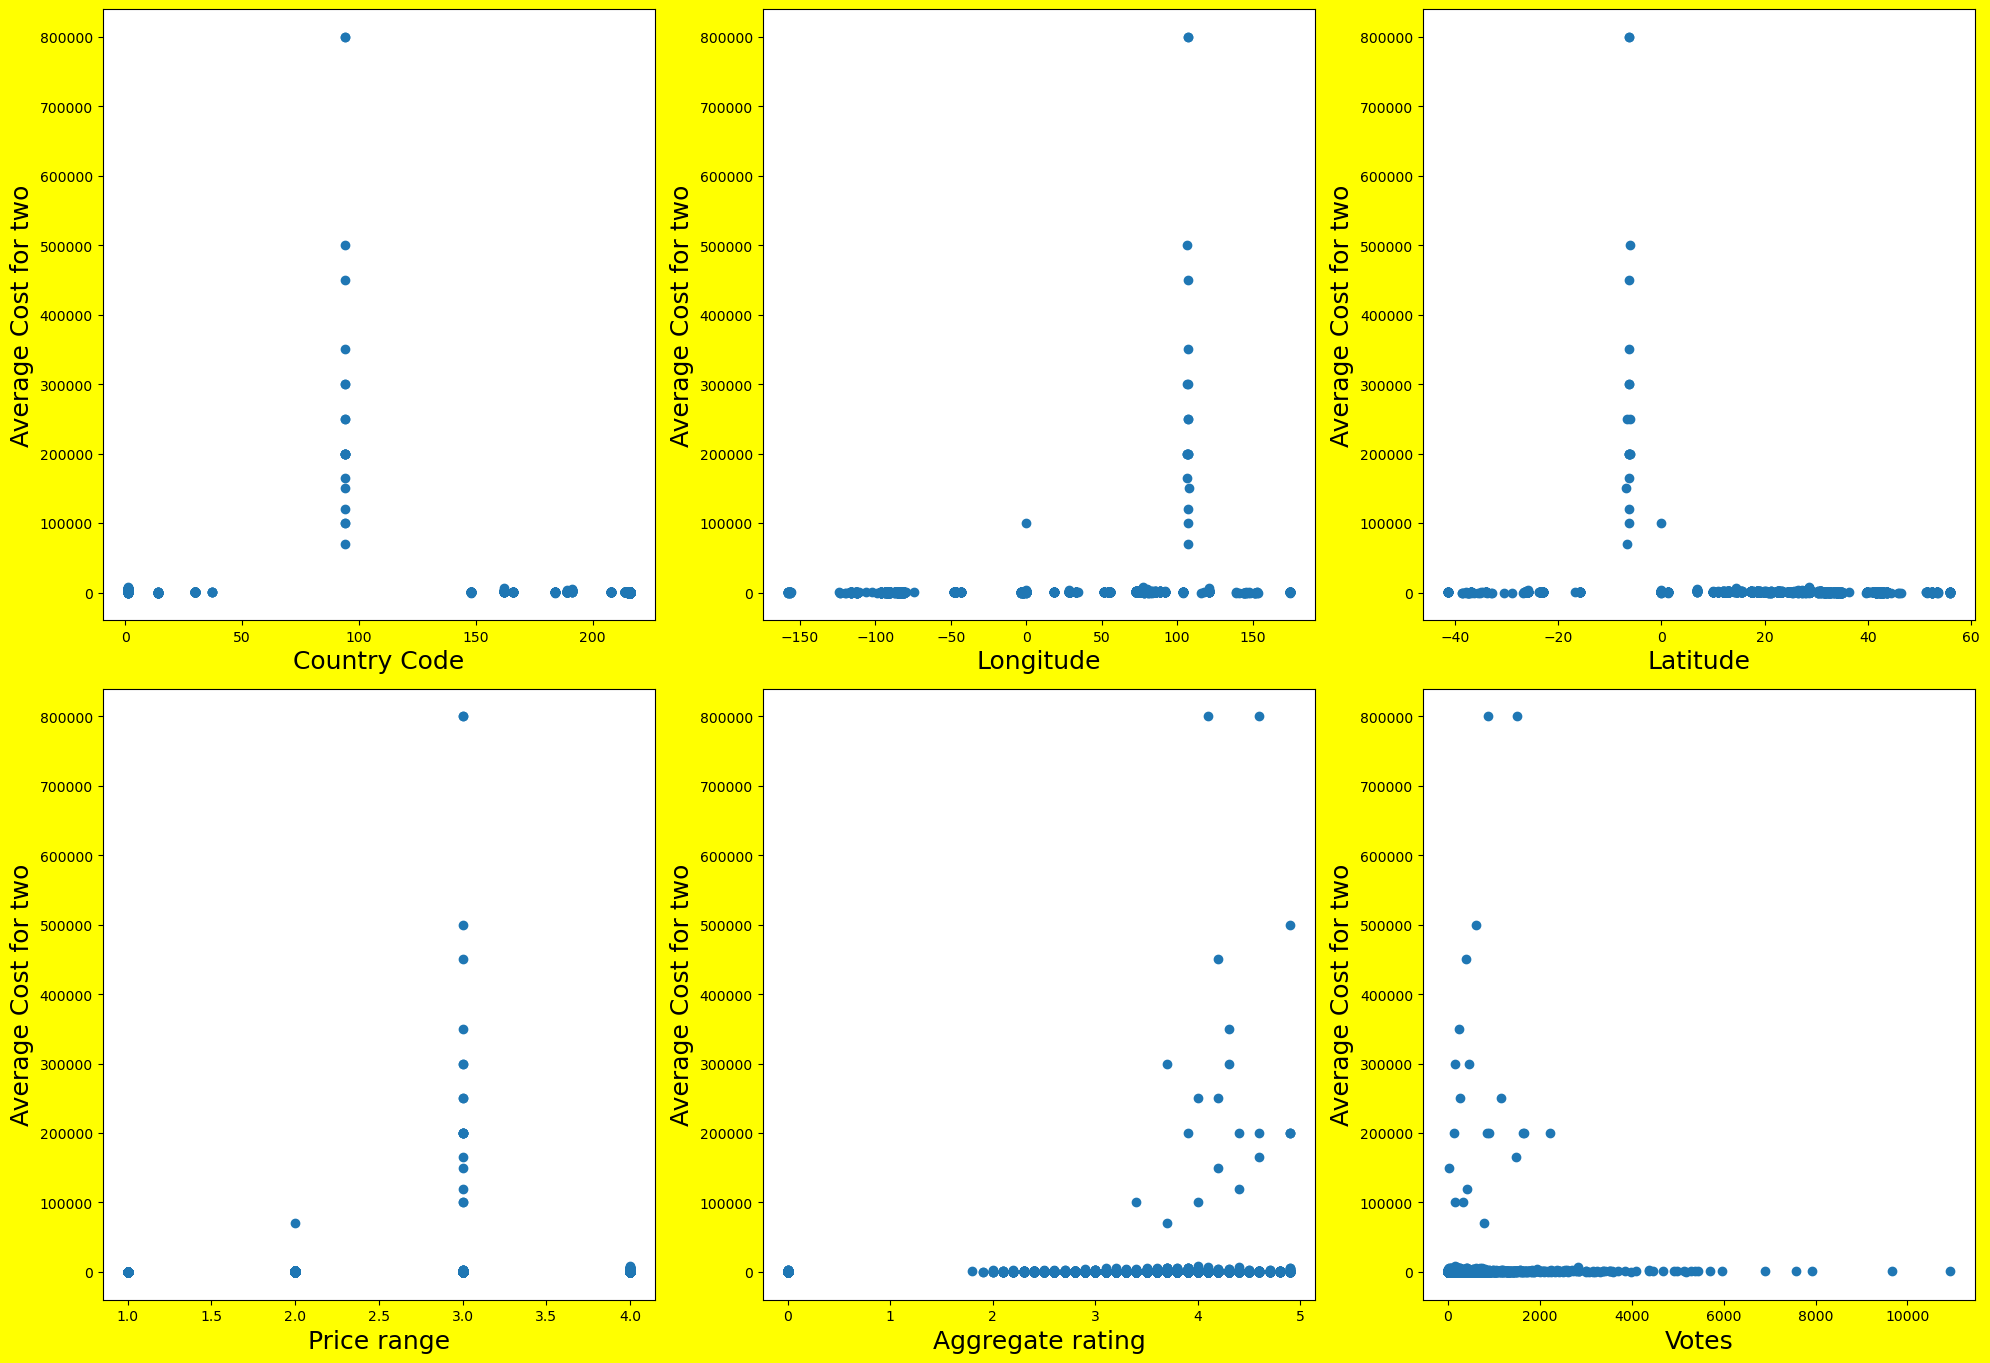

In [16]:
x = data[['Country Code', 'Longitude', 'Latitude', 'Price range', 'Aggregate rating', 'Votes']]
y= (data['Average Cost for two'])
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=7:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter (x[column], y)
        plt.xlabel(column, fontsize=18)
        plt.ylabel ('Average Cost for two', fontsize=18)
        plotnumber +=1
        plt.tight_layout()

I can see that the higher the aggregate rating, the higher the average cost for two is (generally). The price range of 3 yielded the highest cost for two. There is a spike in country code which would suggest that there is a large count for one of the countries.

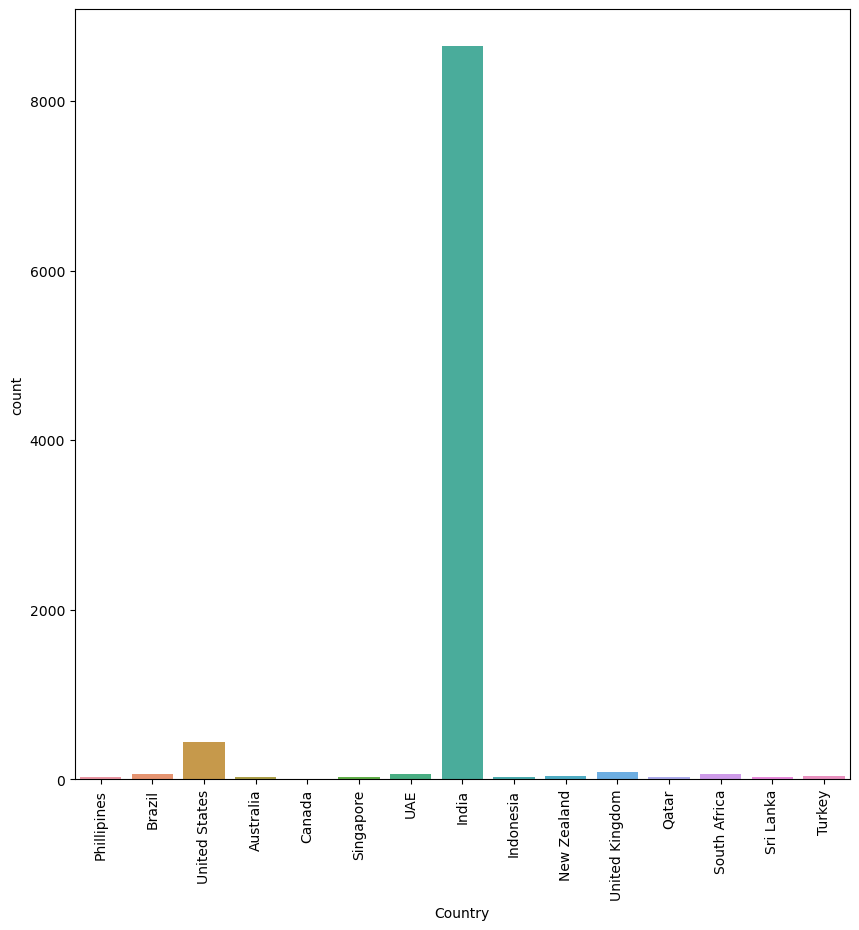

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(data['Country'])
plt.xticks(rotation=90)
plt.show()

As seen in the above scatter graph, India has a significantly larger amount of restaurants

In [18]:
data.Country.value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

India has the highest amounts of resaurants listed by a significant margin

In [39]:
India.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

New Dehli has the highest restaurant count by a significant margin. Mohali and Panchkula only have 1

In [54]:
data.columns

Index(['restaurant name', 'country code', 'city', 'locality',
       'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'price range',
       'aggregate rating', 'rating color', 'rating text', 'votes', 'country'],
      dtype='object')

In [20]:
#Exploring categorical data uaing countplots
categorical_columns = data.select_dtypes(include='object').columns

plt.figure(figsize=(20, 20))
plot_number = 1

for column in categorical_columns:
    plt.subplot(6, 2, plot_number)
    sns.countplot(x=column, data=data)
    plt.xlabel(column, fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.xticks(rotation=90)
    plot_number += 1

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026ECD35FF70> (for post_execute):


KeyboardInterrupt: 

In [22]:
def piechart(i):
    plt.figure(figsize=(10,5),facecolor='yellow')
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

In [23]:
columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now','Price range', 'Rating color','Rating text']


Pie chart for: Has Table booking


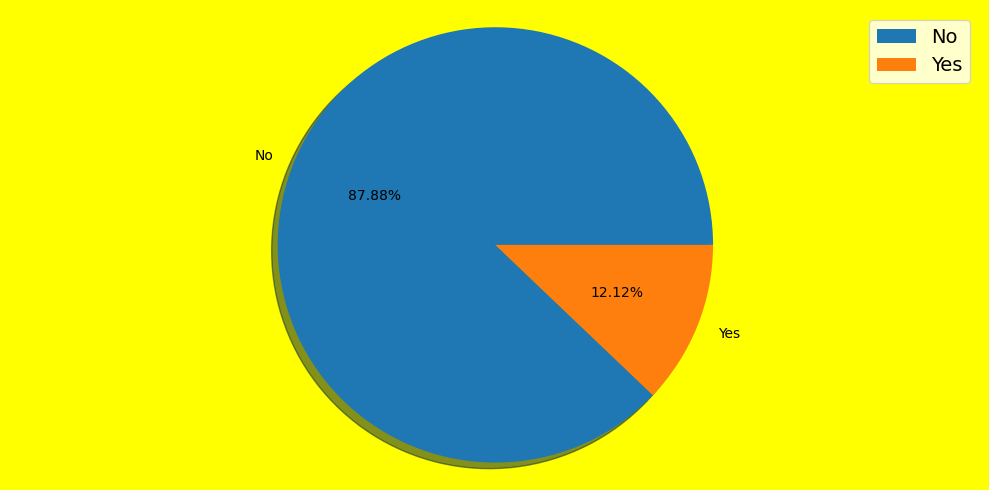

Pie chart for: Has Online delivery


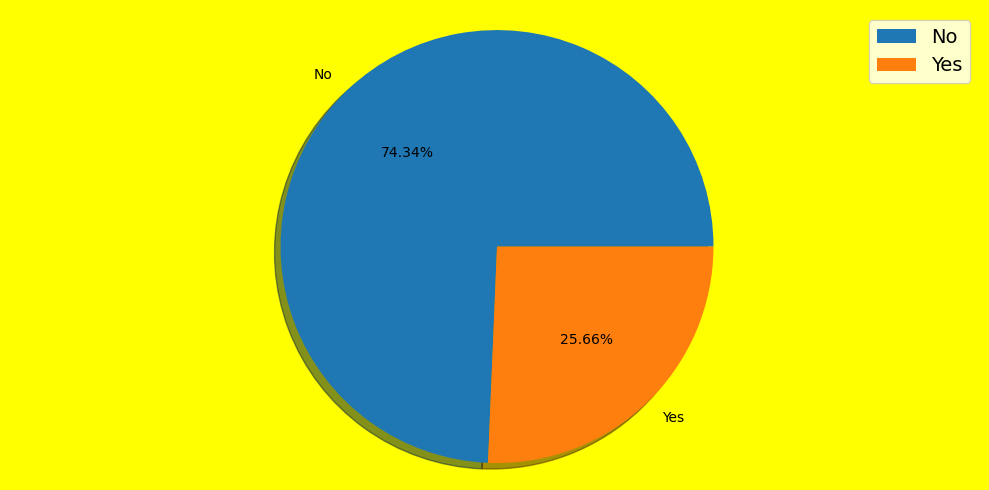

Pie chart for: Is delivering now


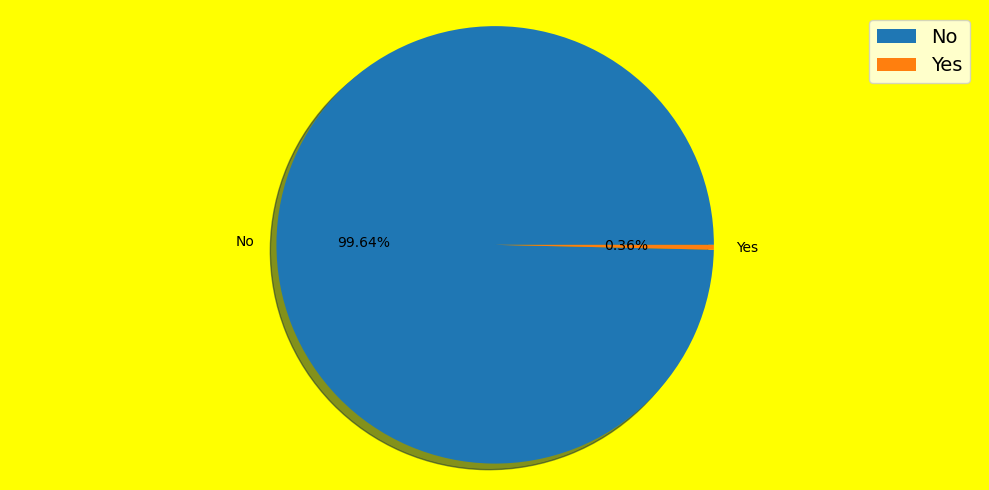

Pie chart for: Price range


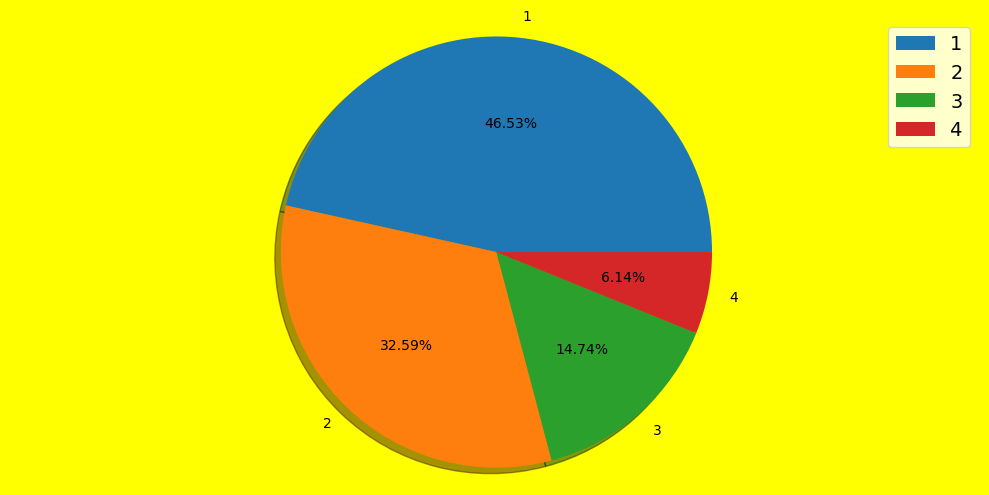

Pie chart for: Rating color


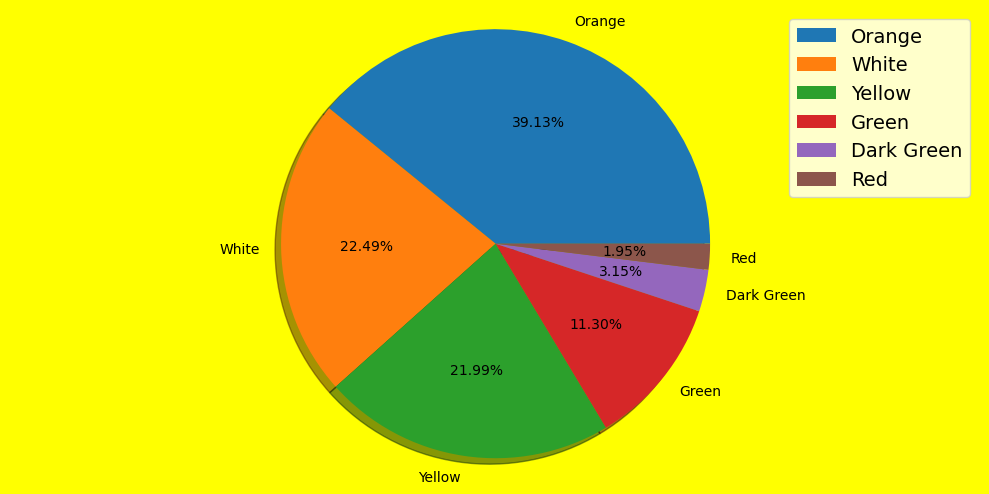

Pie chart for: Rating text


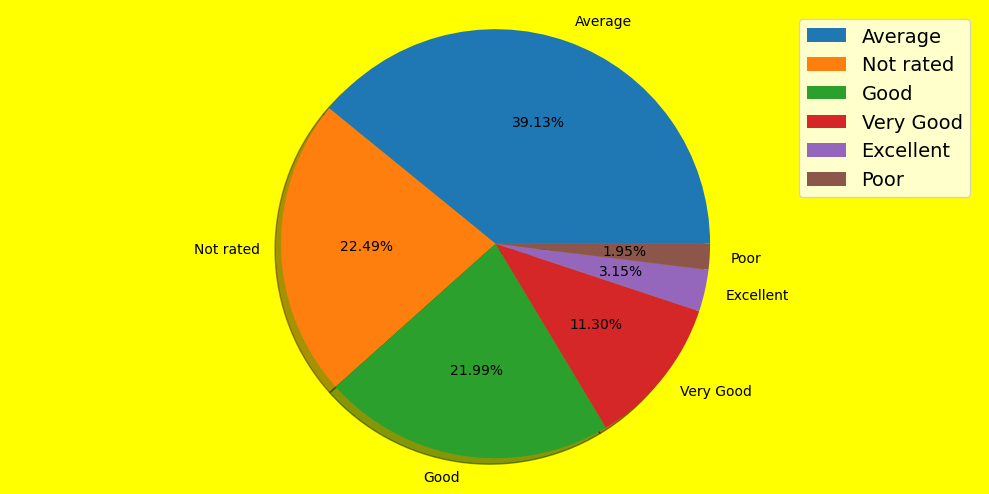

In [29]:
plotnumber=1
for i in data[columns]:
    print(f"Pie chart for:",i )
    piechart(data[i])

Observations based on pie charts:
    - Online delivery is not very common but delivery generally is
    - Table booking isn't very common
    - Maximum count for price range is 1
    - Orange was the highest color rating

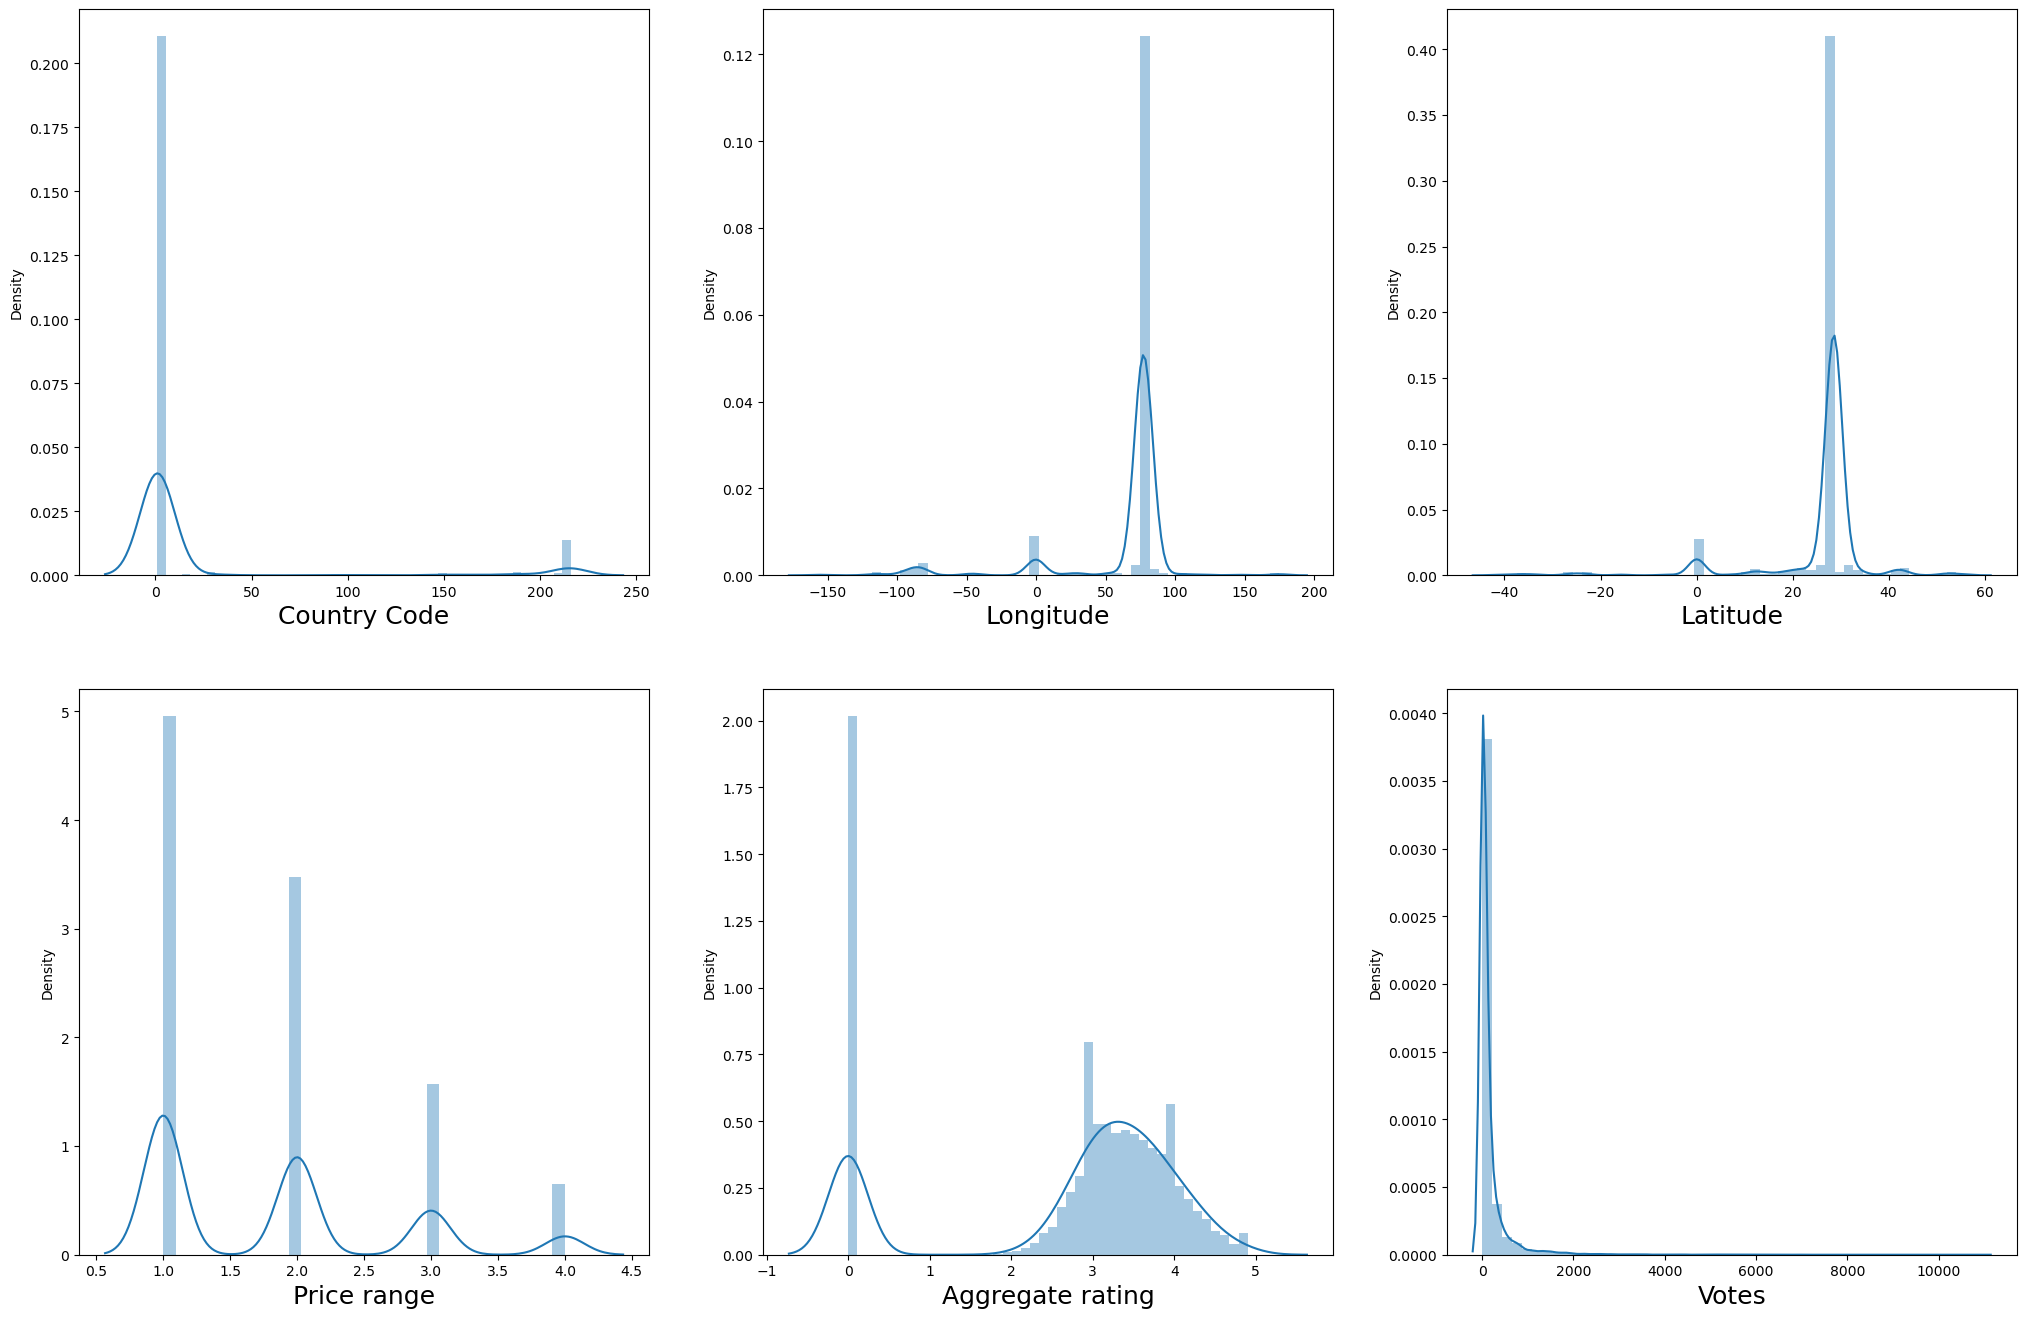

In [30]:
#Check the distribution in the numerical columns 
columns = ['Country Code', 'Longitude', 'Latitude', 'Price range', 'Aggregate rating', 'Votes']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 7:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

I can see that the dataset is heavily skewed

Country Code               AxesSubplot(0.125,0.786098;0.227941x0.0939024)
Longitude               AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
Latitude                AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
Average Cost for two       AxesSubplot(0.125,0.673415;0.227941x0.0939024)
Price range             AxesSubplot(0.398529,0.673415;0.227941x0.0939024)
Aggregate rating        AxesSubplot(0.672059,0.673415;0.227941x0.0939024)
Votes                      AxesSubplot(0.125,0.560732;0.227941x0.0939024)
dtype: object

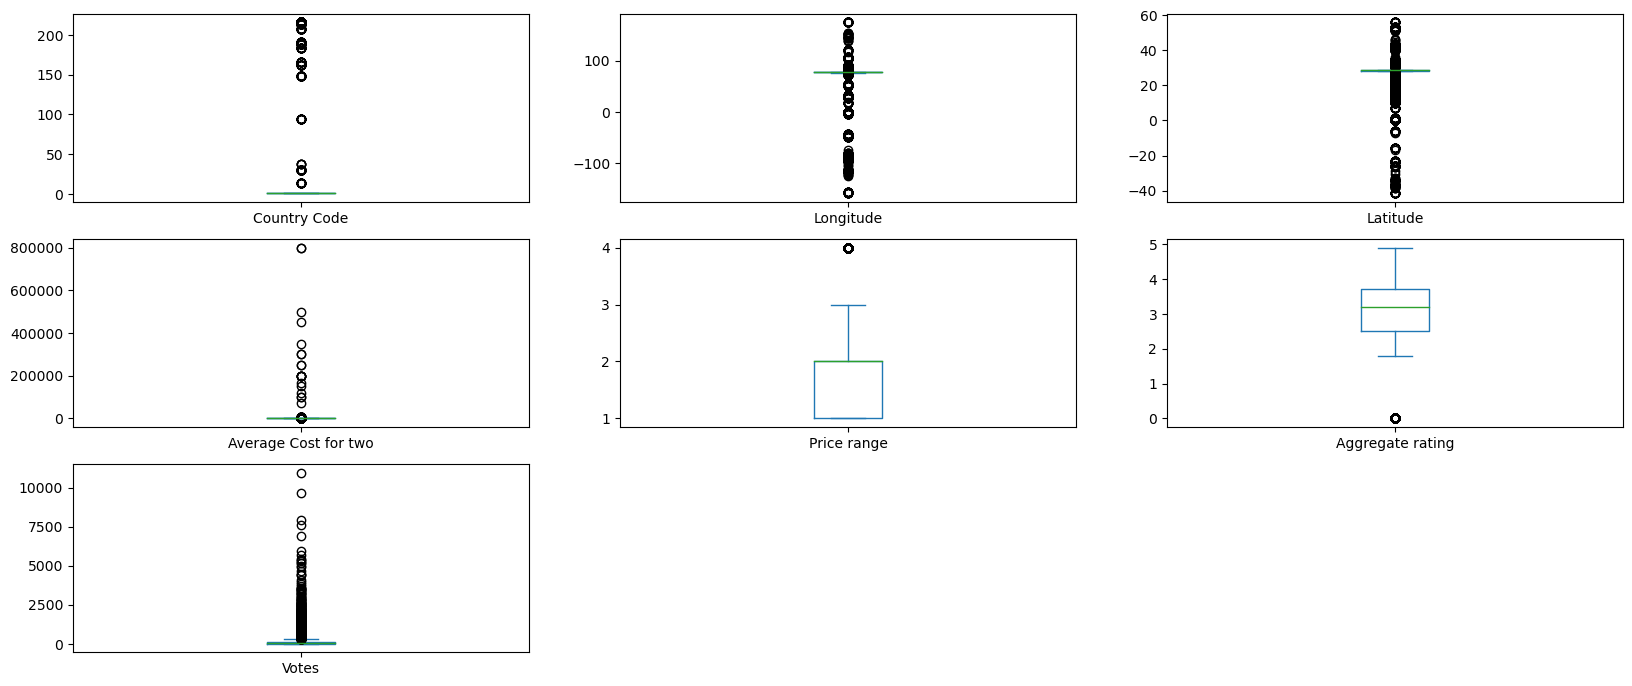

In [31]:
#Exploring outliers
data.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

Significant outliers present that can be treated with power transform

In [34]:
data.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [35]:
#Converting categorical features to numerical using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode = ['Country','Rating text','Rating color','Is delivering now','Has Online delivery','Has Table booking', 'Currency', 'Cuisines', 'Locality', 'Locality Verbose', 'City']

for i in columns_to_encode:
    data[i] = le.fit_transform(data[i])

In [41]:
# Dropping columns 
data.drop(columns=["Restaurant Name"], axis=1, inplace=True)

In [43]:
#Correlation
data.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Cuisines                0.005799
Has Table booking       0.007758
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

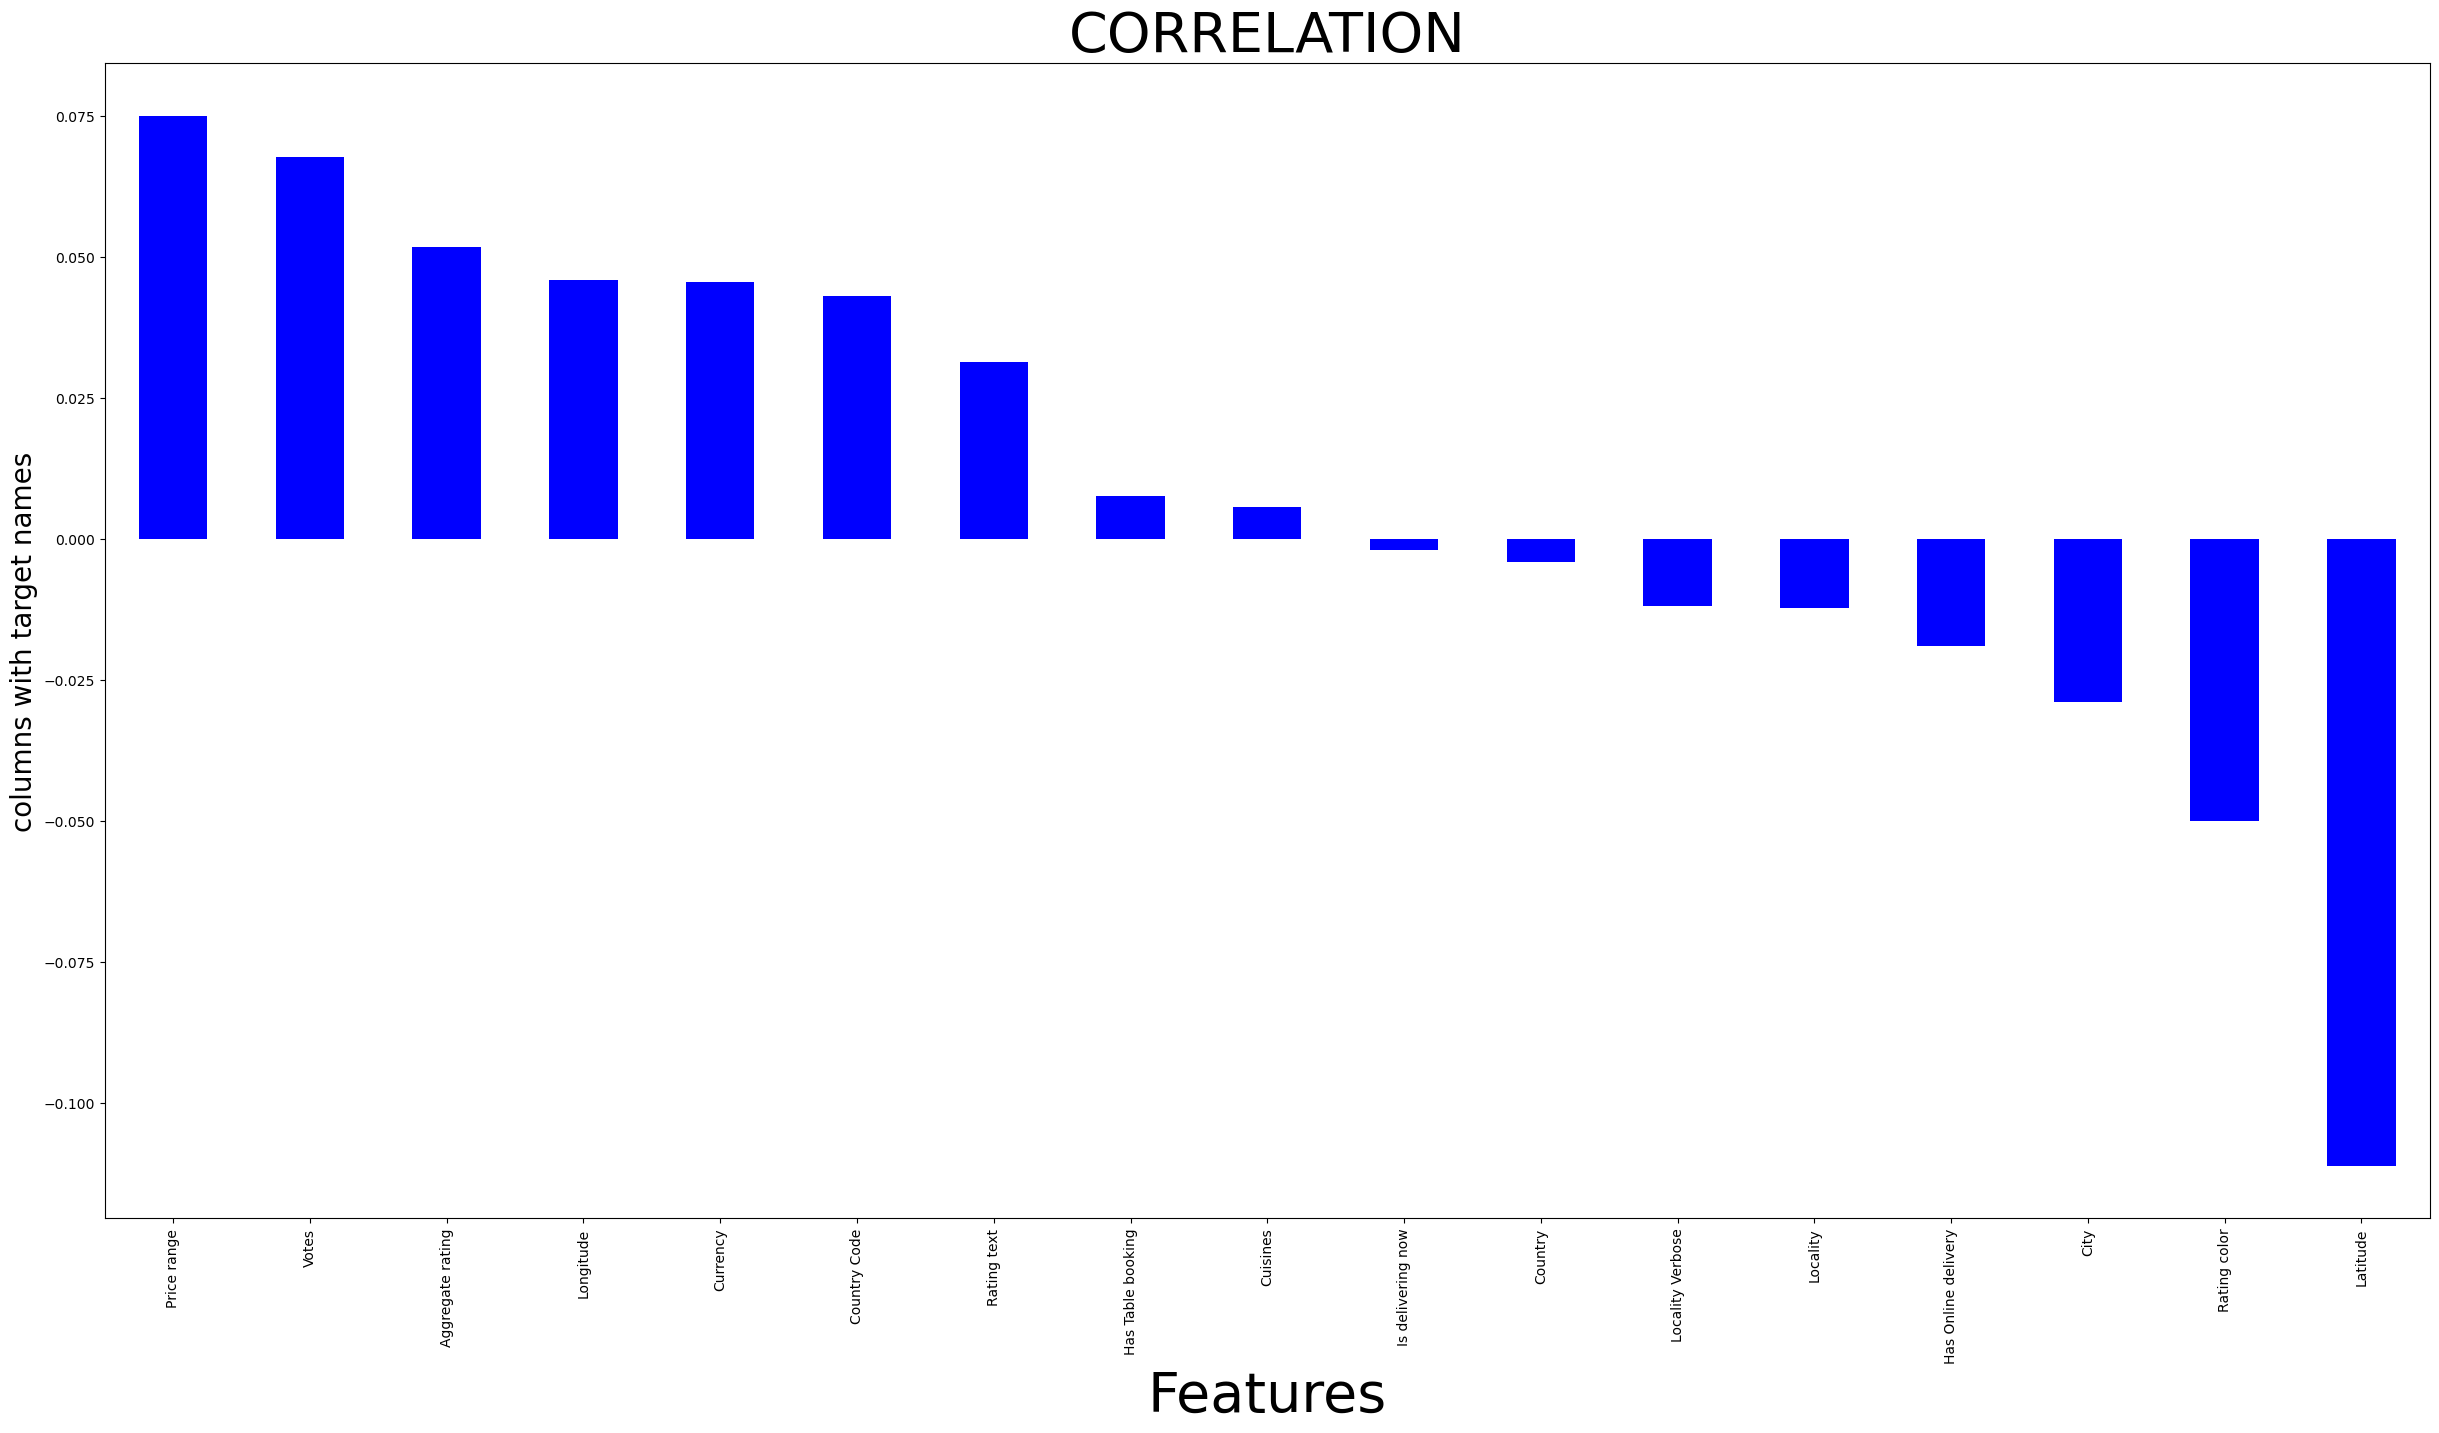

In [45]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(30,15))
data.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=40)
plt.ylabel('columns with target names',fontsize=20)
plt.title('CORRELATION',fontsize=40)
plt.show()

The least correlated columns are 'Is delivering now and Country' and the highest postive and Negative correlated columns are Price Range and Latitude. 

In [46]:
#dropping non-correlated columns
data.drop("Is delivering now",axis=1,inplace=True)

In [47]:
data.drop("Country",axis=1,inplace=True)

In [49]:
data.describe()

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,78.301434,658.128468,677.304994,64.126574,25.854381,989.854151,1199.210763,3.977699,0.121244,0.256622,1.804837,2.666370,2.952885,1.788713,156.909748
std,56.750546,23.198915,315.866515,331.727449,41.467058,11.007935,514.584415,16121.183073,0.914242,0.326428,0.436792,0.905609,1.516378,1.493048,1.694637,430.169145
min,1.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,76.000000,381.000000,387.000000,77.081343,28.478713,497.000000,250.000000,4.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000
50%,1.000000,88.000000,696.000000,707.000000,77.191964,28.570469,1127.000000,400.000000,4.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.000000,88.000000,921.000000,953.000000,77.282006,28.642758,1355.000000,700.000000,4.000000,0.000000,1.000000,2.000000,3.700000,4.000000,3.000000,131.000000
max,216.000000,140.000000,1207.000000,1264.000000,174.832089,55.976980,1825.000000,800000.000000,11.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000


In [50]:
#Dealing with skew
data.skew()

Country Code             3.043965
City                    -1.193777
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.306345
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [51]:
#Using zscore to remove outliers
data.columns

Index(['Country Code', 'City', 'Locality', 'Locality Verbose', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([8, 8, 8, ..., 8, 0, 8], dtype=int64))

In [53]:
#Removing outliers
outliers = np.where(z > threshold)
outlier_rows = outliers[0]
data_new = data.drop(index=data.index[outlier_rows])

In [54]:
data_new.shape

(8442, 16)

In [55]:
data.shape

(9551, 16)

In [56]:
# Percentage of data loss

DataLoss=((9551-8442)/9551)*100
DataLoss

11.611349596900848

 11% data loss

In [57]:
#removingskewness
data_new.skew()

Country Code            20.025975
City                    -1.388329
Locality                -0.316081
Locality Verbose        -0.241242
Longitude               -3.711375
Latitude                -3.249226
Cuisines                -0.346211
Average Cost for two     3.717964
Currency               -18.063574
Has Table booking        2.275168
Has Online delivery      0.985218
Price range              1.050616
Aggregate rating        -0.865741
Rating color             0.102344
Rating text              0.425180
Votes                    3.718698
dtype: float64

In [58]:
#Using Yeojohnson to deal with skewness in non-categorical columns
from sklearn.preprocessing import PowerTransformer

columns_to_transform=['Country Code','Longitude','Latitude' ,'Average Cost for two','Price range','Aggregate rating','Votes']          
PT = PowerTransformer(method='yeo-johnson')

data_new[columns_to_transform] = PT.fit_transform(data_new[columns_to_transform])


In [60]:
data_new.skew()

Country Code             0.000000
City                    -1.388329
Locality                -0.316081
Locality Verbose        -0.241242
Longitude                0.376062
Latitude                -2.653391
Cuisines                -0.346211
Average Cost for two     0.016356
Currency               -18.063574
Has Table booking        2.275168
Has Online delivery      0.985218
Price range              0.249672
Aggregate rating        -0.633806
Rating color             0.102344
Rating text              0.425180
Votes                   -0.006204
dtype: float64

Skewness reduced

In [61]:
data_new.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
456,6.661338e-16,118,106,107,4.729918,-3.227903,515,-0.557951,2,0,0,1.752474,0.586513,2,0,0.259762
457,6.661338e-16,118,107,108,4.729795,-3.227902,102,-0.696105,2,0,0,1.752474,1.154577,1,5,0.244564
458,6.661338e-16,118,159,160,4.725760,-3.227904,922,0.118392,2,0,0,1.752474,0.959745,5,2,0.244564
459,6.661338e-16,118,188,189,4.726037,-3.227903,6,-2.255795,2,0,0,1.752474,0.321273,2,0,0.259762
460,6.661338e-16,118,200,201,4.728563,-3.227901,916,-0.082415,2,0,0,1.752474,0.959745,5,2,0.274537


In [62]:
#Separate into dependent and independent variables
x=data_new.drop (columns=['Average Cost for two'], axis=1)
y=data_new['Average Cost for two']

In [63]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_new)
x_scaled

array([[20.02498439,  2.12073794, -1.86832709, ..., -0.77956839,
        -1.01438782,  0.25976229],
       [20.02498439,  2.12073794, -1.86504263, ..., -1.50556026,
         2.10345315,  0.24456361],
       [20.02498439,  2.12073794, -1.69425078, ...,  1.39840723,
         0.23274856,  0.24456361],
       ...,
       [-0.04993762,  3.02621538,  1.33402013, ...,  1.39840723,
         0.23274856,  0.66097039],
       [-0.04993762,  3.02621538,  1.62305249, ..., -1.50556026,
         2.10345315,  1.42827927],
       [20.02498439, -4.04782711,  0.31912239, ..., -1.50556026,
         2.10345315,  0.21279144]])

In [64]:
#Based on correlation, there could be a possibility of multicolinearity. I will check this with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [66]:
vif_cal()

     VIF FACTOR             FEATURES
0      1.588317         Country Code
1     21.630228                 City
2   5161.937126             Locality
3   4980.808925     Locality Verbose
4      1.909417            Longitude
5      2.013191             Latitude
6      5.154894             Cuisines
7     38.952251             Currency
8      1.600960    Has Table booking
9      1.714938  Has Online delivery
10     1.736835          Price range
11     4.685372     Aggregate rating
12     7.366843         Rating color
13     2.674186          Rating text
14     4.975030                Votes


In [67]:
#dropping highest multicorrelated column
x.drop("Locality",axis=1,inplace=True)

In [68]:
vif_cal()

    VIF FACTOR             FEATURES
0     1.588128         Country Code
1    21.509669                 City
2     5.917800     Locality Verbose
3     1.908386            Longitude
4     2.012514             Latitude
5     5.151352             Cuisines
6    37.816535             Currency
7     1.600910    Has Table booking
8     1.713660  Has Online delivery
9     1.735143          Price range
10    4.684391     Aggregate rating
11    7.366209         Rating color
12    2.673274          Rating text
13    4.971563                Votes


In [69]:
#dropping highest multicorrelated column
x.drop("Currency",axis=1,inplace=True)

In [70]:
vif_cal()

    VIF FACTOR             FEATURES
0     1.509472         Country Code
1    10.270470                 City
2     4.916175     Locality Verbose
3     1.908203            Longitude
4     2.012239             Latitude
5     4.509919             Cuisines
6     1.596685    Has Table booking
7     1.685310  Has Online delivery
8     1.734537          Price range
9     4.464788     Aggregate rating
10    6.632530         Rating color
11    2.597043          Rating text
12    4.906373                Votes


VIF reduced

In [73]:
#Split data into Xtrain/test and ytrain/test
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [75]:
#Import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [76]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.72050649 0.75251315 0.74291114 0.73846503 0.75260231]
0.7413996240475


In [77]:
from sklearn.svm import SVR
SVR = SVR()
cv = cross_val_score(SVR,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.03642891 0.04375429 0.04695849 0.03502723 0.04273521]
0.04098082546926276


Terrible scores

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81031989 0.82289486 0.84070482 0.82586778 0.80922188]
0.8218018472534764


Much better scores

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82042518 0.8357839  0.84171743 0.83037117 0.81942021]
0.8295435780903612


Even better than RF model

In [80]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
cv = cross_val_score(KNN,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.26525596 0.25013004 0.27090349 0.226391   0.27138272]
0.2568126416741562


Poorest scores so far. GB is the best model

In [83]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred_train=gb.predict(x_train)
pred=gb.predict(x_test)
r2=r2_score(y_test, pred)
print ('R2=:',r2)

R2=: 0.7979747531028604


Approximately 80% is good before hyper param tuning

In [84]:
print('R2 score on training data:',r2_score(y_train, pred_train)*100 )
print('Mean absolute error:',mean_absolute_error(y_test, pred) )
print('Mean squared error:',mean_squared_error(y_test, pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred)))

R2 score on training data: 85.85658671668416
Mean absolute error: 0.30241078314120196
Mean squared error: 0.22895193604256467
Root mean squared error: 0.4784892224936364


R2_Score: 0.7976644235799428
MAE: 0.3026802857089403
MSE: 0.22930362745823862
RMSE: 0.4788565833923959
cv :- 0.7125489247216251


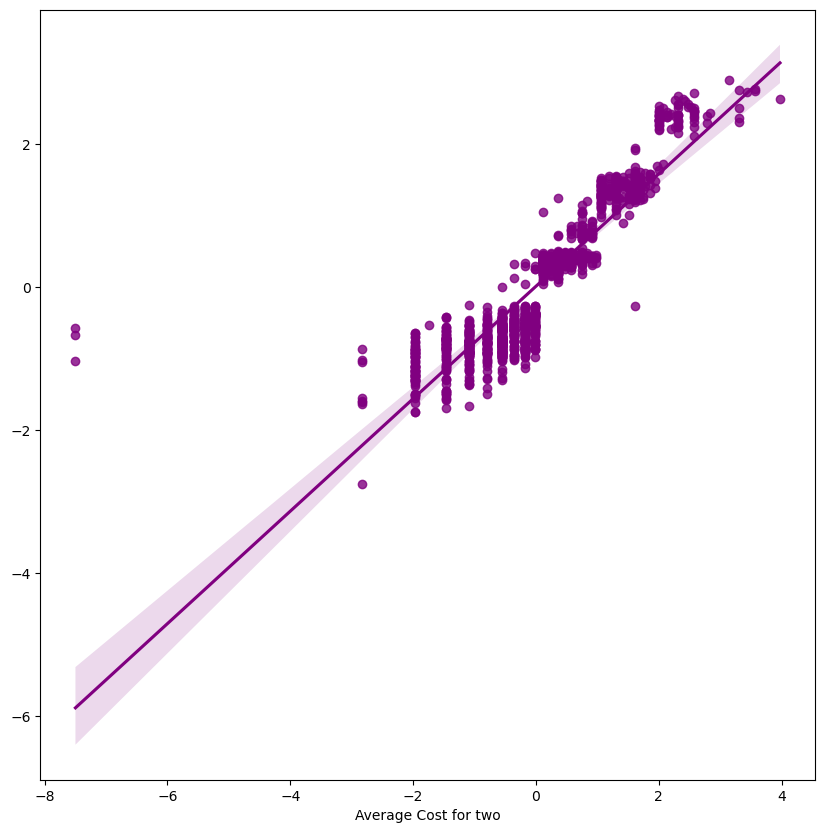

In [88]:
from sklearn import metrics
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))
print('cv :-' ,cross_val_score(gb,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,pred,color="purple")
plt.show()

Most results fall on line

In [89]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [93]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor()

param_grid_gb = {
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'warm_start': [True, False]
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=2, scoring=scorer)
grid_search_gb.fit(x_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(x_test)

print(f"Best Model - Hyperparameters: {best_params_gb}, Best Score: {best_score_gb}")


Best Model - Hyperparameters: {'criterion': 'squared_error', 'loss': 'huber', 'max_features': 'auto', 'warm_start': False}, Best Score: -0.16112531191085125


In [97]:
gb = GradientBoostingRegressor(criterion='squared_error', warm_start=False, max_features='auto',loss='huber')
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 79.55652139467959


In [98]:
#Prediction
prediction = gb.predict(x_test)
prediction

array([-0.24878376, -0.60837988,  0.76324281, ...,  0.29262156,
       -0.48130573,  0.21688827])

In [99]:
pd.DataFrame([gb.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [100]:
import pickle
filename= 'zomato.pkl'
pickle.dump(gb, open(filename,'wb'))
loaded_model= pickle.load(open('zomato.pkl', 'rb'))